<a href="https://colab.research.google.com/github/soujanyakd/Project_CNN_RNN/blob/main/UNSW_Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive. mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#pip install -q keras

In [2]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer


import pydot

In [72]:
#uploading training dataset
data= pd.read_csv("/content/drive/MyDrive/UNSW_NB15_testing-set.csv")
print('-------Data--------')
print(data['attack_cat'].value_counts())
print(len(data))
print('-------------------------')
data

-------Data--------
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64
175341
-------------------------


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


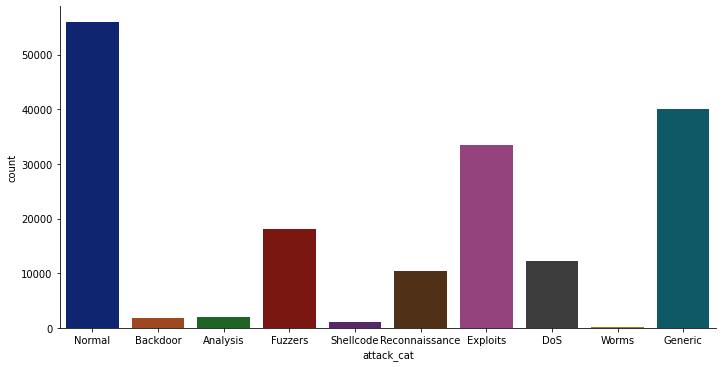

In [73]:
sns.catplot(x="attack_cat",kind="count", data=data, palette="dark",aspect=1.99)

In [74]:
data.drop(data[data['attack_cat']=='Generic'].index, inplace = True)
data.drop(data[data['attack_cat']=='Fuzzers'].index, inplace = True)
data.drop(data[data['attack_cat']=='DoS'].index, inplace = True)
data.drop(data[data['attack_cat']=='Backdoor'].index, inplace = True)
data.drop(data[data['attack_cat']=='Shellcode'].index, inplace = True)
data.drop(data[data['attack_cat']=='Worms'].index, inplace = True)
print(data['attack_cat'].value_counts())

Normal            56000
Exploits          33393
Reconnaissance    10491
Analysis           2000
Name: attack_cat, dtype: int64


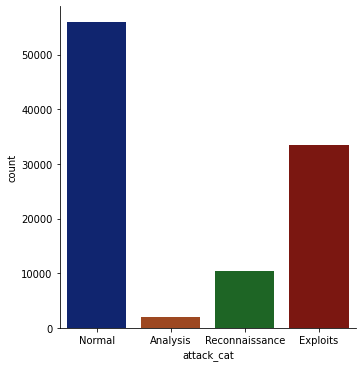

In [75]:
sns.catplot(x="attack_cat",kind="count", data=data, palette="dark",aspect=.99)

In [76]:
data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [77]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101884 entries, 0 to 175305
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101884 non-null  int64  
 1   dur                101884 non-null  float64
 2   proto              101884 non-null  object 
 3   service            101884 non-null  object 
 4   state              101884 non-null  object 
 5   spkts              101884 non-null  int64  
 6   dpkts              101884 non-null  int64  
 7   sbytes             101884 non-null  int64  
 8   dbytes             101884 non-null  int64  
 9   rate               101884 non-null  float64
 10  sttl               101884 non-null  int64  
 11  dttl               101884 non-null  int64  
 12  sload              101884 non-null  float64
 13  dload              101884 non-null  float64
 14  sloss              101884 non-null  int64  
 15  dloss              101884 non-null  int64  
 16  si

In [78]:
print(data['service'].value_counts())
print(data['proto'].value_counts())
print(data['state'].value_counts())

-           63942
http        16186
dns          7713
smtp         4703
ftp-data     3987
ftp          2833
ssh          1301
pop3         1043
snmp           66
dhcp           52
ssl            39
irc            10
radius          9
Name: service, dtype: int64
tcp         64474
udp         18132
unas         6700
arp          2859
ospf         1551
            ...  
rdp            55
ipx-n-ip       55
igmp           18
icmp           15
rtp             1
Name: proto, Length: 133, dtype: int64
FIN    62425
INT    25253
CON    12749
REQ     1362
RST       80
ECO       12
no         1
URN        1
PAR        1
Name: state, dtype: int64


In [79]:

data=data.drop(['service'],axis=1)
data=data.drop(['id'],axis=1)

In [80]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['proto'] = le.fit_transform(data['proto'])
data['state'] = le.fit_transform(data['state'])
data.replace({'attack_cat':{'Normal':0,'Exploits':1,'Reconnaissance':2,'Analysis':3}},inplace=True)
print(data['attack_cat'].value_counts())

0    56000
1    33393
2    10491
3     2000
Name: attack_cat, dtype: int64


In [81]:
data = data.apply(pd.to_numeric)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101884 entries, 0 to 175305
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                101884 non-null  float64
 1   proto              101884 non-null  int64  
 2   state              101884 non-null  int64  
 3   spkts              101884 non-null  int64  
 4   dpkts              101884 non-null  int64  
 5   sbytes             101884 non-null  int64  
 6   dbytes             101884 non-null  int64  
 7   rate               101884 non-null  float64
 8   sttl               101884 non-null  int64  
 9   dttl               101884 non-null  int64  
 10  sload              101884 non-null  float64
 11  dload              101884 non-null  float64
 12  sloss              101884 non-null  int64  
 13  dloss              101884 non-null  int64  
 14  sinpkt             101884 non-null  float64
 15  dinpkt             101884 non-null  float64
 16  sj

In [83]:
data.round(decimals=2)
data = data.astype(int)
data

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,113,2,6,4,258,172,74,252,254,14158,8495,0,0,24,8,30,11,255,621772692,2202533631,255,0,0,0,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0
1,0,113,2,14,38,734,42014,78,62,252,8395,503571,2,17,49,15,61,1387,255,1417884146,3077387971,255,0,0,0,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0,0
2,1,113,2,8,16,364,13186,14,62,252,1572,60929,1,6,231,102,17179,11420,255,2116150707,2963114973,255,0,0,0,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0,0
3,1,113,2,12,12,628,770,13,62,252,2740,3358,1,3,152,90,259,4991,255,1107119177,1047442890,255,0,0,0,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0,0
4,0,113,2,10,6,534,268,33,254,252,8561,3987,2,1,47,75,2415,115,255,2436137549,1977154190,255,0,0,0,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175214,0,113,2,22,56,2424,68382,77,62,252,18717,543250,6,26,47,17,2347,1589,255,3903615664,3345025299,255,0,0,0,110,1221,1,109,1,1,1,1,1,1,0,0,1,21,1,0,1,1
175267,1,113,2,74,30,69997,2132,53,62,252,288572,8613,33,8,26,65,2412,90,255,556303757,246088519,255,0,0,0,946,71,0,0,1,1,1,1,1,1,0,0,0,18,1,0,1,1
175277,3,113,2,66,340,3086,426483,108,62,252,6539,914689,6,167,57,10,3358,1585,255,3046870123,1723342386,255,0,0,0,47,1254,0,0,1,1,1,1,1,1,0,0,0,2,1,0,1,1
175299,0,113,2,20,30,942,16684,49,62,252,7185,129476,7,13,52,33,3005,2479,255,5604755,575257391,255,0,0,0,47,556,0,0,1,1,1,1,1,1,0,0,0,7,1,0,1,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101884 entries, 0 to 175305
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   dur                101884 non-null  int64
 1   proto              101884 non-null  int64
 2   state              101884 non-null  int64
 3   spkts              101884 non-null  int64
 4   dpkts              101884 non-null  int64
 5   sbytes             101884 non-null  int64
 6   dbytes             101884 non-null  int64
 7   rate               101884 non-null  int64
 8   sttl               101884 non-null  int64
 9   dttl               101884 non-null  int64
 10  sload              101884 non-null  int64
 11  dload              101884 non-null  int64
 12  sloss              101884 non-null  int64
 13  dloss              101884 non-null  int64
 14  sinpkt             101884 non-null  int64
 15  dinpkt             101884 non-null  int64
 16  sjit               101884 non-null  in

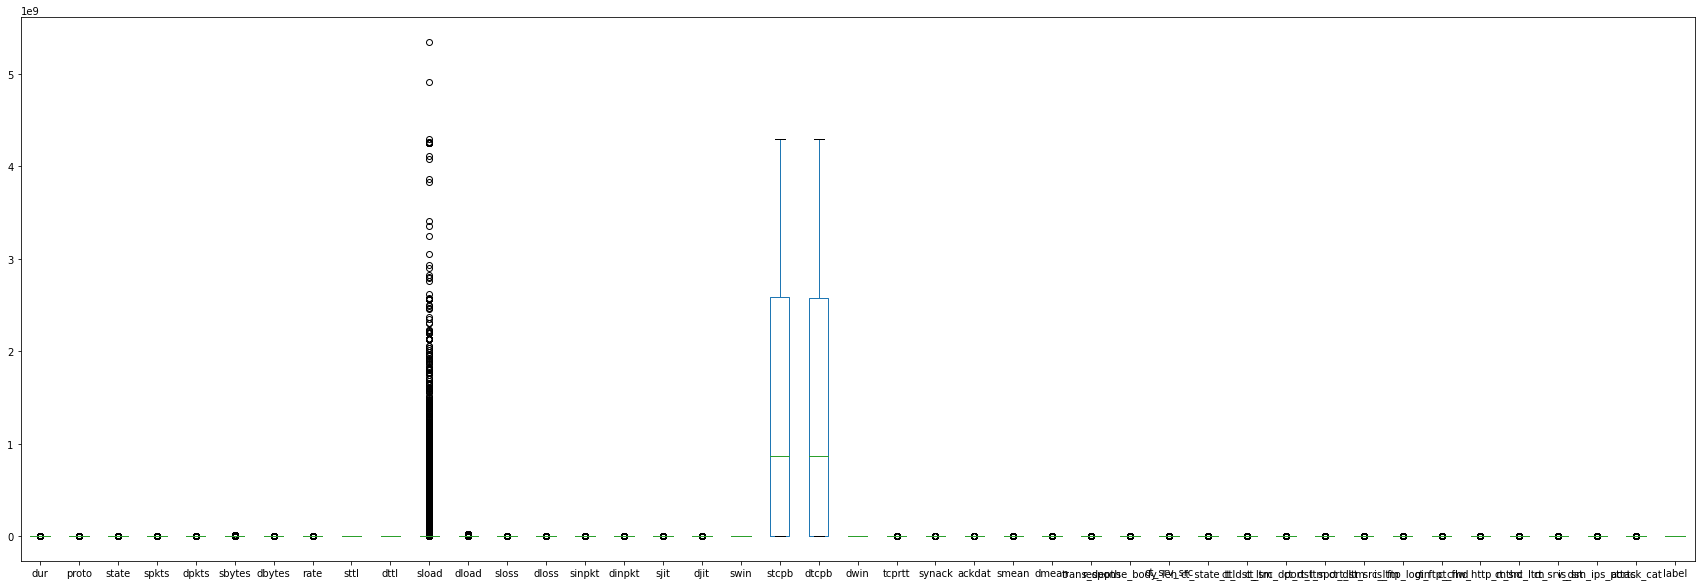

In [86]:
import matplotlib.pyplot as plt
data.plot(kind='box', figsize=(30,10))
plt.show()

In [87]:
data=data.drop(['sload'],axis=1)
data=data.drop(['dload'],axis=1)

In [88]:
# Find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(data, 0.8)
print('correlated features: ', set(corr_features) )

correlated features:  {'sloss', 'sbytes', 'ct_srv_dst', 'dbytes', 'is_sm_ips_ports', 'ct_ftp_cmd', 'dloss', 'label', 'dwin'}


In [89]:
data.drop(labels=corr_features, axis=1, inplace=True)

In [90]:
features = data.drop(['attack_cat'],axis=1)
target = data['attack_cat']
X_Train,X_Test,Y_Train,Y_Test=train_test_split(features,target,test_size = 0.2,random_state=42)

In [91]:
X = X_Train
Y = Y_Train
C = Y_Test
T = X_Test
print(T)
print(X)

       dur  proto  state  ...  is_ftp_login  ct_flw_http_mthd  ct_src_ltm
2339     0    113      2  ...             0                 0           8
43641    0    113      2  ...             0                 0           1
10538    0    113      2  ...             0                 0           8
85617    0    120      3  ...             0                 0           6
6662     0    119      0  ...             0                 0           2
...    ...    ...    ...  ...           ...               ...         ...
2824     0    119      0  ...             0                 0           2
51896    0    113      2  ...             0                 0           1
20424    0    119      0  ...             0                 0           3
63675    0    113      2  ...             0                 1           3
80526    1    113      2  ...             0                 0           2

[20377 rows x 31 columns]
        dur  proto  state  ...  is_ftp_login  ct_flw_http_mthd  ct_src_ltm
119548    

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
trainX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#print(trainX[0:5,:])

In [93]:
scaler = StandardScaler()
# transform data
testT = scaler.fit_transform(T)
# summarize transformed data
np.set_printoptions(precision=3)
#print(testT[0:5,:])

In [95]:
from keras.utils.np_utils import to_categorical
y_train1 = np.array(Y)
y_test1 = np.array(C)
y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)

# **CNN Algorithm**

In [140]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.layers.convolutional import MaxPooling1D

In [141]:
lstm_output_size = 128

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(31,1)))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.1))
cnn.add(Dense(4, activation="softmax"))
print(cnn.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 31, 64)            256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 15, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               123008    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 516       
Total params: 123,780
Trainable params: 123,780
Non-trainable params: 0
________________________________________________

In [142]:
X_train = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0], testT.shape[1],1))
cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
cnn.fit(X_train, y_train,epochs=50)

Epoch 1/50
2548/2548 [==============================] - 13s 5ms/step - loss: 0.1826 - accuracy: 0.8543
Epoch 2/50
2548/2548 [==============================] - 13s 5ms/step - loss: 0.1158 - accuracy: 0.9142
Epoch 3/50
2548/2548 [==============================] - 12s 5ms/step - loss: 0.1133 - accuracy: 0.9169
Epoch 4/50
2548/2548 [==============================] - 12s 5ms/step - loss: 0.1075 - accuracy: 0.9207
Epoch 5/50
2548/2548 [==============================] - 12s 5ms/step - loss: 0.1031 - accuracy: 0.9235
Epoch 6/50
2548/2548 [==============================] - 13s 5ms/step - loss: 0.1005 - accuracy: 0.9252
Epoch 7/50
2548/2548 [==============================] - 12s 5ms/step - loss: 0.0999 - accuracy: 0.9252
Epoch 8/50
2548/2548 [==============================] - 12s 5ms/step - loss: 0.0964 - accuracy: 0.9276
Epoch 9/50
2548/2548 [==============================] - 12s 5ms/step - loss: 0.0965 - accuracy: 0.9276
Epoch 10/50
2548/2548 [==============================] - 12s 5ms/step - l

In [143]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

637/637 [==============================] - 1s 2ms/step - loss: 0.0982 - accuracy: 0.9278

Loss: 0.10, Accuracy: 92.78%


In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
y_pred1 = cnn.predict_classes(X_test)
y_pred= to_categorical(y_pred1)
np.savetxt('/content/drive/MyDrive/expected.txt', y_test, fmt='%01d')
np.savetxt('/content/drive/MyDrive/predicted.txt', y_pred, fmt='%01d')
cnn_accuracy = accuracy_score(y_test, y_pred)
cnn_error = (1- cnn_accuracy)*100
cnn_recall = recall_score(y_test, y_pred , average="weighted")
cnn_precision = precision_score(y_test, y_pred , average="weighted")
cnn_f1 = f1_score(y_test, y_pred, average="weighted")

print("confusion matrix")
print("----------------------------------------------")
print("accuracy")
print("%.6f" %cnn_accuracy)
print("racall")
print("%.6f" %cnn_recall)
print("precision")
print("%.6f" %cnn_precision)
print("f1score")
print("%.6f" %cnn_f1)
cm = confusion_matrix(y_test1, y_pred1)
print(cm)
print("==============================================")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion matrix
----------------------------------------------
accuracy
0.927811
racall
0.927811
precision
0.926268
f1score
0.919674
[[10955   214    16    20]
 [  116  6486    51     6]
 [   67   609  1431     0]
 [   49   323     0    34]]


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1, target_names=['Normal','Exploits','Reconnaissance','Analysis']))

                precision    recall  f1-score   support

        Normal       0.98      0.98      0.98     11205
      Exploits       0.85      0.97      0.91      6659
Reconnaissance       0.96      0.68      0.79      2107
      Analysis       0.57      0.08      0.15       406

      accuracy                           0.93     20377
     macro avg       0.84      0.68      0.71     20377
  weighted avg       0.93      0.93      0.92     20377



# **RNN Algorithm**

In [146]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical

In [147]:
rnn = Sequential()
rnn.add(SimpleRNN(64,input_dim=31, return_sequences=True))  
rnn.add(Dropout(0.1))
rnn.add(SimpleRNN(64,input_dim=31, return_sequences=False))  
rnn.add(Dropout(0.1))
rnn.add(Dense(4))
rnn.add(Activation('softmax'))
print(rnn.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, None, 64)          6144      
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 260       
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 14,660
Trainable params: 14,660
Non-trainable params: 0
__________________________________________________

In [148]:
X_train = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0],1, testT.shape[1]))
rnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
rnn.fit(X_train, y_train,epochs=50)

Epoch 1/50
2548/2548 [==============================] - 9s 3ms/step - loss: 0.2394 - accuracy: 0.8159
Epoch 2/50
2548/2548 [==============================] - 7s 3ms/step - loss: 0.1433 - accuracy: 0.8911
Epoch 3/50
2548/2548 [==============================] - 7s 3ms/step - loss: 0.1317 - accuracy: 0.9021
Epoch 4/50
2548/2548 [==============================] - 7s 3ms/step - loss: 0.1256 - accuracy: 0.9074
Epoch 5/50
2548/2548 [==============================] - 6s 3ms/step - loss: 0.1222 - accuracy: 0.9091
Epoch 6/50
2548/2548 [==============================] - 7s 3ms/step - loss: 0.1173 - accuracy: 0.9138
Epoch 7/50
2548/2548 [==============================] - 7s 3ms/step - loss: 0.1168 - accuracy: 0.9141
Epoch 8/50
2548/2548 [==============================] - 7s 3ms/step - loss: 0.1151 - accuracy: 0.9151
Epoch 9/50
2548/2548 [==============================] - 7s 3ms/step - loss: 0.1146 - accuracy: 0.9145
Epoch 10/50
2548/2548 [==============================] - 7s 3ms/step - loss: 0.112

In [149]:
loss, accuracy = rnn.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

637/637 [==============================] - 2s 1ms/step - loss: 0.0933 - accuracy: 0.9285

Loss: 0.09, Accuracy: 92.85%


In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
y_pred1 = rnn.predict_classes(X_test)
y_pred= to_categorical(y_pred1)
np.savetxt('/content/drive/MyDrive/expected.txt', y_test, fmt='%01d')
np.savetxt('/content/drive/MyDrive/predicted.txt', y_pred, fmt='%01d')
rnn_accuracy = accuracy_score(y_test, y_pred)
rnn_error = (1-rnn_accuracy)*100
rnn_recall = recall_score(y_test, y_pred , average="weighted")
rnn_precision = precision_score(y_test, y_pred , average="weighted")
rnn_f1 = f1_score(y_test, y_pred, average="weighted")

print("confusion matrix")
print("----------------------------------------------")
print("accuracy")
print("%.6f" %rnn_accuracy)
print("racall")
print("%.6f" %rnn_recall)
print("precision")
print("%.6f" %rnn_precision)
print("f1score")
print("%.6f" %rnn_f1)
cm = confusion_matrix(y_test1, y_pred1)
print(cm)
print("==============================================")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion matrix
----------------------------------------------
accuracy
0.928547
racall
0.928547
precision
0.927446
f1score
0.921123
[[10941   209    28    27]
 [  122  6493    38     6]
 [   35   627  1445     0]
 [   41   323     0    42]]


In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1, target_names=['Normal','Exploits','Reconnaissance','Analysis']))

                precision    recall  f1-score   support

        Normal       0.98      0.98      0.98     11205
      Exploits       0.85      0.98      0.91      6659
Reconnaissance       0.96      0.69      0.80      2107
      Analysis       0.56      0.10      0.17       406

      accuracy                           0.93     20377
     macro avg       0.84      0.69      0.72     20377
  weighted avg       0.93      0.93      0.92     20377



## **SVM Algorithm**

In [152]:
from sklearn.svm import SVC
model = SVC(kernel='sigmoid',C=0.1,random_state = 1)
model.fit(trainX, y_train1)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [153]:
predict = model.predict(testT)

In [154]:
svm_accuracy = accuracy_score(y_test1, predict)
svm_error = (1- svm_accuracy)*100
svm_recall = recall_score(y_test1, predict , average="weighted")
svm_precision = precision_score(y_test1, predict , average="weighted")
svm_f1 = f1_score(y_test1, predict, average="weighted")

print("----------------------------------------------")
print("accuracy")
print("%.6f" %svm_accuracy)
print("racall")
print("%.6f" %svm_recall)
print("precision")
print("%.6f" %svm_precision)
print("f1score")
print("%.6f" %svm_f1)
print("==============================================")

----------------------------------------------
accuracy
0.768906
racall
0.768906
precision
0.757710
f1score
0.760999


In [155]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
print(classification_report(y_test1, predict,target_names=['Normal','Exploits','Reconnaissance','Analysis']))
cm = confusion_matrix(y_test1, predict)
print(cm)


                precision    recall  f1-score   support

        Normal       0.85      0.88      0.86     11205
      Exploits       0.69      0.74      0.72      6659
Reconnaissance       0.61      0.42      0.50      2107
      Analysis       0.02      0.01      0.02       406

      accuracy                           0.77     20377
     macro avg       0.54      0.51      0.52     20377
  weighted avg       0.76      0.77      0.76     20377

[[9832 1060  176  137]
 [1284 4948  371   56]
 [ 360  834  883   30]
 [  81  308   12    5]]


# **Decision Tree Algorithm**

In [156]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(trainX, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [157]:
predict = dtc.predict(testT)

In [158]:
dtc_accuracy = accuracy_score(y_test1, predict)
dtc_error = (1-dtc_accuracy)*100
dtc_recall = recall_score(y_test1, predict , average="weighted")
dtc_precision = precision_score(y_test1, predict , average="weighted")
dtc_f1 = f1_score(y_test1, predict, average="weighted")

print("----------------------------------------------")
print("accuracy")
print("%.6f" %dtc_accuracy)
print("racall")
print("%.6f" %dtc_recall)
print("precision")
print("%.6f" %dtc_precision)
print("f1score")
print("%.6f" %dtc_f1)
print("==============================================")

----------------------------------------------
accuracy
0.772047
racall
0.772047
precision
0.764111
f1score
0.752473


In [159]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
print(classification_report(y_test1, predict,target_names=['Normal','Exploits','Reconnaissance','Analysis']))
cm = confusion_matrix(y_test1, predict)
print(cm)


                precision    recall  f1-score   support

        Normal       0.79      0.95      0.86     11205
      Exploits       0.73      0.64      0.68      6659
Reconnaissance       0.84      0.38      0.52      2107
      Analysis       0.27      0.05      0.09       406

      accuracy                           0.77     20377
     macro avg       0.66      0.51      0.54     20377
  weighted avg       0.76      0.77      0.75     20377

[[10660   528     8     9]
 [ 2216  4251   146    46]
 [  368   938   800     1]
 [  277   107     1    21]]


In [161]:
report = pd.DataFrame(index=[1,2,3,4])
report['Algorithm'] = ['Convolutional Neural Network(CNN)', 'Recrrent Neural network(RNN)','Support vector Machine(SVM)', 'Decision Tree(DT)']
report['Accuracy (%)'] = [cnn_accuracy*100, rnn_accuracy*100,svm_accuracy*100,dtc_accuracy*100]
report['Error (%)'] = [cnn_error, rnn_error,svm_error,dtc_error]
report['Precision (%)'] = [cnn_precision*100,rnn_precision*100,svm_precision*100,dtc_precision*100]
report['Recall (%)'] = [cnn_recall*100,rnn_recall*100,svm_recall*100,dtc_recall*100]
report['F1 score (%)'] = [cnn_f1*100,rnn_f1*100,svm_f1*100,dtc_f1*100]
print("============================Multiclass Classification of Attacks============================")
report

============================Multiclass Classification of Attacks============================


,Algorithm,Accuracy (%),Error (%),Precision (%),Recall (%),F1 score (%)
1,Convolutional Neural Network(CNN),92.781077,7.218923,92.626776,92.781077,91.967388
2,Recrrent Neural network(RNN),92.854689,7.145311,92.744551,92.854689,92.112316
3,Support vector Machine(SVM),76.890612,23.109388,75.771046,76.890612,76.099907
4,Decision Tree(DT),77.204692,22.795308,76.411086,77.204692,75.247347


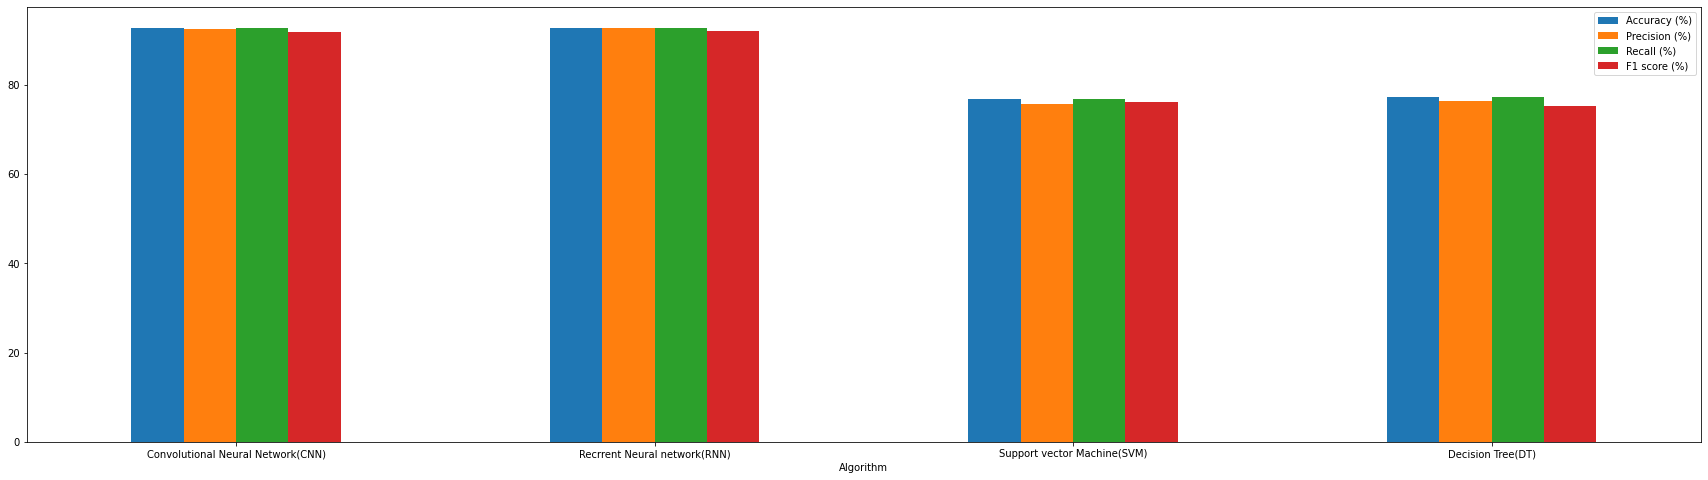

In [171]:
import matplotlib.pyplot as plt
report.plot(x="Algorithm", y=["Accuracy (%)", "Precision (%)", "Recall (%)","F1 score (%)"], kind="bar",figsize=(30,8))
plt.xticks(rotation=360)
plt.show()

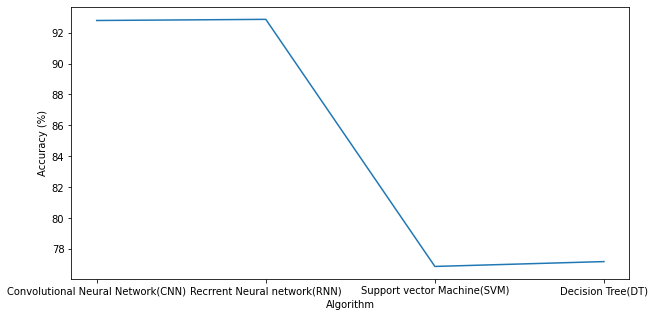

In [169]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x="Algorithm", y="Accuracy (%)", data=report, ax=ax)
plt.show()